# Previous lessons

### When Data has Date + Time, but no Frequency

- Wide-form data is ofen explicitly designed for time series data. With wide-form we generally have time steps that are evenly spaced acorss columns.
- What if there is long-form data with values down to the second (more frequent than desired or is usable)?
- Below is an example talking through this scenario and prepaing a dataset for future use.

#### The Data

- Data is Baltimore's Open Data website 'Part 1 Crime Data'

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)

In [2]:
df = pd.read_csv('Data/Part_1_Crime_Data.csv',low_memory=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597673 entries, 0 to 597672
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                596693 non-null  float64
 1   Y                596693 non-null  float64
 2   RowID            597673 non-null  int64  
 3   CCNumber         597673 non-null  object 
 4   CrimeDateTime    597673 non-null  object 
 5   CrimeCode        597673 non-null  object 
 6   Description      597673 non-null  object 
 7   Inside_Outside   544343 non-null  object 
 8   Weapon           145144 non-null  object 
 9   Post             589803 non-null  float64
 10  Gender           502220 non-null  object 
 11  Age              481276 non-null  float64
 12  Race             573346 non-null  object 
 13  Ethnicity        70817 non-null   object 
 14  Location         594243 non-null  object 
 15  Old_District     567605 non-null  object 
 16  New_District     22198 non-null   obje

X          Y  RowID  CCNumber           CrimeDateTime CrimeCode  \
0 -76.638939  39.301867      1  23J10799  2023/10/29 18:30:00+00        7A   
1 -76.664729  39.353442      2  23J10167  2023/10/28 13:00:00+00        7A   
2 -76.637153  39.277893      3  23J10188  2023/10/28 16:30:00+00        4B   
3 -76.672066  39.282897      4  23J10059  2023/10/28 07:30:00+00        4E   
4 -76.653158  39.289319      5  23J10210  2023/10/28 17:37:00+00        4B   

      Description Inside_Outside                    Weapon   Post Gender  \
0      AUTO THEFT         Inside                       NaN  715.0      M   
1      AUTO THEFT         Inside                       NaN  636.0      F   
2    AGG. ASSAULT         Inside  KNIFE_CUTTING_INSTRUMENT  931.0      M   
3  COMMON ASSAULT        Outside          PERSONAL_WEAPONS  822.0      M   
4    AGG. ASSAULT        Outside              BLUNT_OBJECT  824.0      M   

    Age                       Race               Ethnicity  \
0  34.0  BLACK_OR_AFRICAN_AMERICAN                 UNKNOWN   
1  41.0  BLACK_OR_AFRICAN_AMERICAN  NOT_HISPANIC_OR_LATINO   
2  53.0  BLACK_OR_AFRICAN_AMERICAN                 UNKNOWN   
3  37.0  BLACK_OR_AFRICAN_AMERICAN  NOT_HISPANIC_OR_LATINO   
4   NaN  BLACK_OR_AFRICAN_AMERICAN  NOT_HISPANIC_OR_LATINO   

               Location Old_District New_District  \
0       1100 N CAREY ST          NaN      WESTERN   
1  2400 W BELVEDERE AVE          NaN    NORTHWEST   
2          1200 BUSH ST          NaN     SOUTHERN   
3       200 S HILTON ST          NaN    SOUTHWEST   
4     2300 W FAYETTE ST          NaN    SOUTHWEST   

                      Neighborhood   Latitude  Longitude  \
0              SANDTOWN-WINCHESTER  39.301867 -76.638939   
1                        LEVINDALE  39.353442 -76.664729   
2       WASHINGTON VILLAGE/PIGTOWN  39.277893 -76.637153   
3             CARROLL-SOUTH HILTON  39.282897 -76.672066   
4  PENROSE/FAYETTE STREET OUTREACH  39.289319 -76.653158   

                                GeoLocation        PremiseType  \
0  (39.301867000000001,-76.638938999999993)             STREET   
1  (39.353442000000001,-76.664728999999994)        SHED/GARAGE   
2  (39.277892999999999,-76.637152999999998)             STREET   
3  (39.282896999999998,-76.672066000000001)  OTHER/RESIDENTIAL   
4  (39.289318999999999,-76.653158000000005)  OTHER/RESIDENTIAL   

   Total_Incidents  
0                1  
1                1  
2                1  
3                1  
4                1

- This dataset is messier and gives us much more data than is needed.
- Examine one value from the Crime Data Time column

In [3]:
test_date = df.loc[0, 'CrimeDateTime']
test_date

'2023/10/29 18:30:00+00'

- There is not only a date, but also a specific time given
- The +00 at the end is for time zone data
- BY default many datasets use 'UTC' time - Universal Coordinated Time
- The value after + indicates how many hours difference between UTC and the current time zone
- Having 'time zone-aware' timestamps can cause problems in some situations, but will be revisited later on.

In [4]:
test_datetime = pd.to_datetime(test_date)
test_datetime

Timestamp('2023-10-29 18:30:00+0000', tz='UTC')

#### Preparing the Date Time Index

In [5]:
# df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'])

# This code will give an error of 'Out of bounds nanosecond timestamp'

- There are some irrational values causing problems when trying to convert the entire column.
    - There is no way to have a crime report from the year 1202
    - errors='coerce' can be added to tell Pandas to replace any bad values with NaT, which is the value assigned to null values within as time series.

In [6]:
# Replace null values
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], errors='coerce')

In [7]:
# Next check to see how many null values were created
df['CrimeDateTime'].isna().sum()

4

- The number was low; let's drop any NaT

In [8]:
df = df.dropna(subset='CrimeDateTime')
df['CrimeDateTime'].isna().sum()

0

In [9]:
# With NaT values addressed, set the CrimeDateTime as index
df = df.set_index('CrimeDateTime')
df.head(3)

X          Y  RowID  CCNumber CrimeCode  \
CrimeDateTime                                                                
2023-10-29 18:30:00+00:00 -76.638939  39.301867      1  23J10799        7A   
2023-10-28 13:00:00+00:00 -76.664729  39.353442      2  23J10167        7A   
2023-10-28 16:30:00+00:00 -76.637153  39.277893      3  23J10188        4B   

                            Description Inside_Outside  \
CrimeDateTime                                            
2023-10-29 18:30:00+00:00    AUTO THEFT         Inside   
2023-10-28 13:00:00+00:00    AUTO THEFT         Inside   
2023-10-28 16:30:00+00:00  AGG. ASSAULT         Inside   

                                             Weapon   Post Gender   Age  \
CrimeDateTime                                                             
2023-10-29 18:30:00+00:00                       NaN  715.0      M  34.0   
2023-10-28 13:00:00+00:00                       NaN  636.0      F  41.0   
2023-10-28 16:30:00+00:00  KNIFE_CUTTING_INSTRUMENT  931.0      M  53.0   

                                                Race               Ethnicity  \
CrimeDateTime                                                                  
2023-10-29 18:30:00+00:00  BLACK_OR_AFRICAN_AMERICAN                 UNKNOWN   
2023-10-28 13:00:00+00:00  BLACK_OR_AFRICAN_AMERICAN  NOT_HISPANIC_OR_LATINO   
2023-10-28 16:30:00+00:00  BLACK_OR_AFRICAN_AMERICAN                 UNKNOWN   

                                       Location Old_District New_District  \
CrimeDateTime                                                               
2023-10-29 18:30:00+00:00       1100 N CAREY ST          NaN      WESTERN   
2023-10-28 13:00:00+00:00  2400 W BELVEDERE AVE          NaN    NORTHWEST   
2023-10-28 16:30:00+00:00          1200 BUSH ST          NaN     SOUTHERN   

                                         Neighborhood   Latitude  Longitude  \
CrimeDateTime                                                                 
2023-10-29 18:30:00+00:00         SANDTOWN-WINCHESTER  39.301867 -76.638939   
2023-10-28 13:00:00+00:00                   LEVINDALE  39.353442 -76.664729   
2023-10-28 16:30:00+00:00  WASHINGTON VILLAGE/PIGTOWN  39.277893 -76.637153   

                                                        GeoLocation  \
CrimeDateTime                                                         
2023-10-29 18:30:00+00:00  (39.301867000000001,-76.638938999999993)   
2023-10-28 13:00:00+00:00  (39.353442000000001,-76.664728999999994)   
2023-10-28 16:30:00+00:00  (39.277892999999999,-76.637152999999998)   

                           PremiseType  Total_Incidents  
CrimeDateTime                                            
2023-10-29 18:30:00+00:00       STREET                1  
2023-10-28 13:00:00+00:00  SHED/GARAGE                1  
2023-10-28 16:30:00+00:00       STREET                1

- The times above are not in order.
- Note: must sort_index to see the earlierst and most recent timestamp

In [10]:
df = df.sort_index()
df.index

DatetimeIndex(['1720-08-14 02:56:02+00:00', '1730-09-03 18:26:02+00:00',
               '1920-06-18 01:30:00+00:00', '1922-06-22 13:00:00+00:00',
               '1928-09-26 10:00:00+00:00', '1930-10-29 08:50:00+00:00',
               '1930-10-29 19:00:00+00:00', '1963-10-30 00:00:00+00:00',
               '1966-01-01 01:00:00+00:00', '1969-07-20 21:00:00+00:00',
               ...
               '2023-12-02 20:45:00+00:00', '2023-12-02 20:53:00+00:00',
               '2023-12-02 20:58:00+00:00', '2023-12-02 20:58:00+00:00',
               '2023-12-02 21:00:00+00:00', '2023-12-02 21:20:00+00:00',
               '2023-12-02 21:40:00+00:00', '2023-12-02 21:50:00+00:00',
               '2023-12-02 21:50:00+00:00', '2023-12-02 22:10:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=597669, freq=None)

- There appear to be a few values going back to the early and mid 1900's, along with two values from the 1700's(?)
- Get a quick visualization of crime data to asses years

<Axes: >

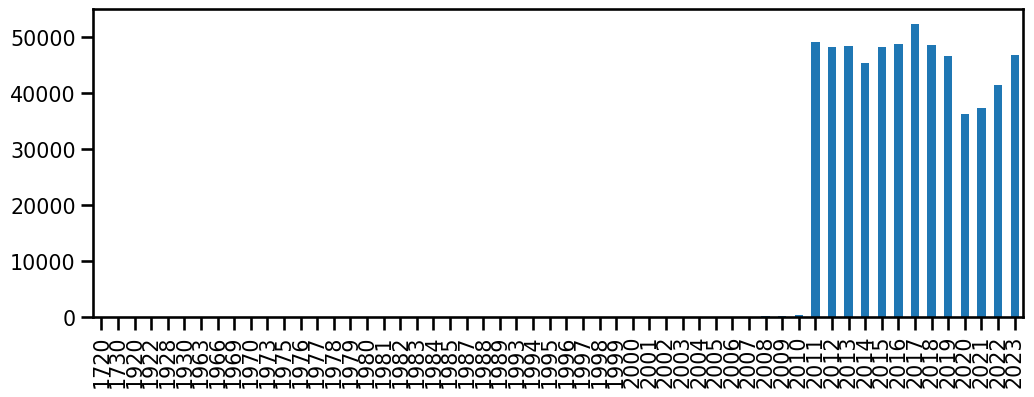

In [11]:
years = df.index.year
years.value_counts().sort_index().plot(kind='bar')

- The bulk of the data appears to be from 2011 onward, so we will limit our dataset to that.

In [12]:
# Limit data to 2011-present
df = df.loc['2011':]
df.index

DatetimeIndex(['2011-01-01 00:00:00+00:00', '2011-01-01 00:00:00+00:00',
               '2011-01-01 00:00:00+00:00', '2011-01-01 00:01:00+00:00',
               '2011-01-01 00:01:00+00:00', '2011-01-01 00:05:00+00:00',
               '2011-01-01 00:05:00+00:00', '2011-01-01 00:05:00+00:00',
               '2011-01-01 00:10:00+00:00', '2011-01-01 00:15:00+00:00',
               ...
               '2023-12-02 20:45:00+00:00', '2023-12-02 20:53:00+00:00',
               '2023-12-02 20:58:00+00:00', '2023-12-02 20:58:00+00:00',
               '2023-12-02 21:00:00+00:00', '2023-12-02 21:20:00+00:00',
               '2023-12-02 21:40:00+00:00', '2023-12-02 21:50:00+00:00',
               '2023-12-02 21:50:00+00:00', '2023-12-02 22:10:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=596642, freq=None)

### Inspecting the Data Format

- Frist, examine features in the dataset to make a gameplan for preparing the time series.
- By the end, each row should be 1 day, with each type of crime having it's own column, in which there should be the number(#) of crimes for that specific date.
- There is a LOT of information about each specific crime, but the majority of it is extraneous for this exercise/project.
    - The CrimeDateTime column has the exact date and time the crime was reported - this will become the datetime index.
    - There is a Description column with the name of the type of crime - this will be the starting point for creating individual columns for each type of crime
- Give a quick examination of what types of crimes and how many of each.

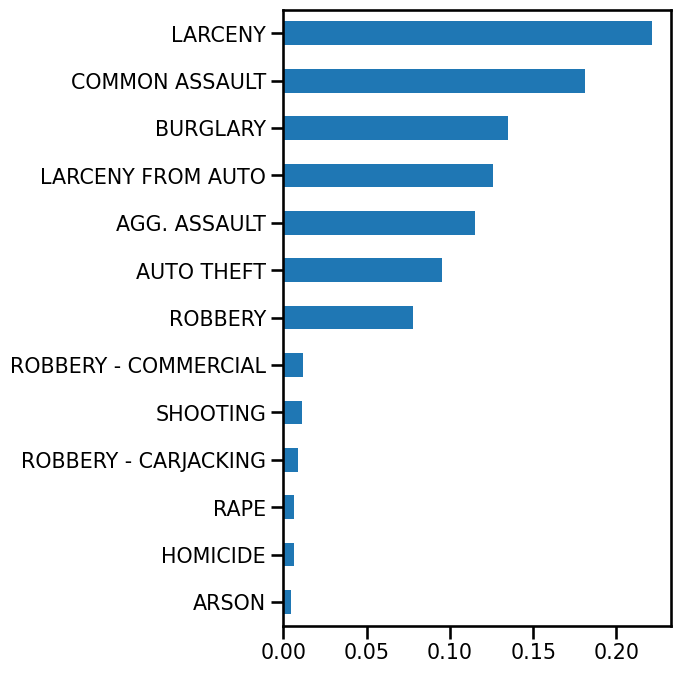

In [13]:
# Inspect value_counts for the different types of crimes
crime_counts = df['Description'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh', figsize=(5,8));

- Another way to visualize this is to take advantage of Pandas Styling
 - See 'Table Visualization' section of Pandas doc for details
- First, make a DataFrame (not a Series)
- Next, use df.style, which allows access to several styling methods
    - To convert the series to a dataframe, use the series' .to_frame() method. A name for the series-turned-column can be given inside the method as such `.to_frame('New Name')`
- Use .style.bar to add a barplot INSIDE the dataframe

In [14]:
# Inspect value_counts for the different types of crimes
crime_counts = df['Description'].value_counts().to_frame('Total # of Crimes')
crime_counts

Total # of Crimes
LARCENY                          132195
COMMON ASSAULT                   108224
BURGLARY                          80422
LARCENY FROM AUTO                 74944
AGG. ASSAULT                      68572
AUTO THEFT                        56822
ROBBERY                           46520
ROBBERY - COMMERCIAL               7135
SHOOTING                           6645
ROBBERY - CARJACKING               5094
RAPE                               3802
HOMICIDE                           3659
ARSON                              2608

In [15]:
# Display an inline-barplot inside the dataframe
crime_counts.style.bar('Total # of Crimes')

- The perks of the visual are that it doesn't take up much space, still displays the data in the value_counts form, but also adds the nice clear visual summary with bars.
- It can be noted there are 13 types of crime to create columns for.

#### Using Dictionaries and Loops to Prepare Time Series

- Before starting think about how to get the total counts for each crime.
    - One option is using the Total Incidents column, which already has a count of the crimes.
    - A second option is to use .size as the aggregation method after resampling.

- **.size() vs .count()**
    - Why not use .count() when the goal is to count the # of crimes per day?
    - .count() will produce a 2-dimensional result with a count column for EVERY column.
    - .size() will simply return the # of rows (1-dimensional)
    - Additionally, the count method includes null values in the result which will be fine for this example.
- **For this scenario, .size() will be much cleaner.**

In [16]:
# Demoing groupby with .counts() vs .size()
df.groupby('Description').count().head()

X       Y   RowID  CCNumber  CrimeCode  Inside_Outside  \
Description                                                                   
AGG. ASSAULT     68465   68465   68572     68572      68572           62076   
ARSON             2601    2601    2608      2608       2608            2398   
AUTO THEFT       56714   56714   56822     56822      56822           53451   
BURGLARY         80372   80372   80422     80422      80422           75703   
COMMON ASSAULT  108090  108090  108224    108224     108224           98407   

                Weapon    Post  Gender     Age    Race  Ethnicity  Location  \
Description                                                                   
AGG. ASSAULT     67039   67653   65696   64118   67723      11130     68076   
ARSON             2244    2560    1974    1554    2465        195      2596   
AUTO THEFT          73   55924   51302   50221   54064      12268     56371   
BURGLARY           238   79970   62162   56380   75726       4814     80228   
COMMON ASSAULT   20974  107026  103747  100039  106914      16664    107629   

                Old_District  New_District  Neighborhood  Latitude  Longitude  \
Description                                                                     
AGG. ASSAULT           65367          2286         67555     68465      68465   
ARSON                   2468            92          2558      2601       2601   
AUTO THEFT             49894          6027         55866     56714      56714   
BURGLARY               78233          1736         79920     80372      80372   
COMMON ASSAULT        103416          3610        106889    108090     108090   

                GeoLocation  PremiseType  Total_Incidents  
Description                                                
AGG. ASSAULT          68572        62076            68572  
ARSON                  2608         2398             2608  
AUTO THEFT            56822        53451            56822  
BURGLARY              80422        75703            80422  
COMMON ASSAULT       108224        98407           108224

In [17]:
df.groupby('Description').size().head()

Description
AGG. ASSAULT       68572
ARSON               2608
AUTO THEFT         56822
BURGLARY           80422
COMMON ASSAULT    108224
dtype: int64

- Note that .size() results match the 'Total Incidents' column of the df (far right).
- This gives the same information, but in a much cleaner result.

### Plan for Creating Columns for each Crime Type

**Putting the above steps together will help create a succinct plan for organizing our data.**

In order to create separate columns:
1. Get a list of all unique crime descriptions in the dataset
2. Create an empty dictionary where the new time series crime columns will be saved.
3. Loop through the list of crimes and:
    - A) Save a temporary DataFrame to filter all the rows of that type of crime
    - B) Resample the temp df as Daily data (crime counts) and save the .size()
    - C) Save the temp df in the dictionary, using the crime description as the key
4. Finally, convert the dictionaries to a DataFrame

#### Testing 1 Crime Frist

In [18]:
# Make the dictionary
CRIMES = {}

In [19]:
# Test 1 crime before creating the loop
crime = 'ROBBERY'
crime

'ROBBERY'

In [20]:
# A) Save a temp df of just the rows that match the crime
temp = df.loc[ df['Description']==crime]
temp.head(3)

X          Y   RowID  CCNumber CrimeCode  \
CrimeDateTime                                                                 
2011-01-01 02:45:00+00:00 -76.593990  39.297354  574471  11A00126       3AF   
2011-01-01 04:25:00+00:00 -76.658482  39.342387  577058  11A00157        3B   
2011-01-01 04:55:00+00:00 -76.598510  39.292969  569084  11A00161        3B   

                          Description Inside_Outside   Weapon   Post Gender  \
CrimeDateTime                                                                 
2011-01-01 02:45:00+00:00     ROBBERY              O  FIREARM  321.0      M   
2011-01-01 04:25:00+00:00     ROBBERY              I      NaN  532.0      F   
2011-01-01 04:55:00+00:00     ROBBERY              O      NaN  212.0      M   

                            Age                       Race Ethnicity  \
CrimeDateTime                                                          
2011-01-01 02:45:00+00:00  22.0  BLACK_OR_AFRICAN_AMERICAN       NaN   
2011-01-01 04:25:00+00:00  23.0  BLACK_OR_AFRICAN_AMERICAN       NaN   
2011-01-01 04:55:00+00:00  55.0  BLACK_OR_AFRICAN_AMERICAN       NaN   

                                       Location Old_District New_District  \
CrimeDateTime                                                               
2011-01-01 02:45:00+00:00          600 BROADWAY      EASTERN          NaN   
2011-01-01 04:25:00+00:00  2500 EDGECOMBE CIR N     NORTHERN          NaN   
2011-01-01 04:55:00+00:00     1400 E FAYETTE ST    SOUTHEAST          NaN   

                              Neighborhood   Latitude  Longitude  \
CrimeDateTime                                                      
2011-01-01 02:45:00+00:00  DUNBAR-BROADWAY  39.297354 -76.593990   
2011-01-01 04:25:00+00:00         PARKLANE  39.342387 -76.658482   
2011-01-01 04:55:00+00:00  DUNBAR-BROADWAY  39.292969 -76.598510   

                                                        GeoLocation  \
CrimeDateTime                                                         
2011-01-01 02:45:00+00:00                     (39.297354,-76.59399)   
2011-01-01 04:25:00+00:00                    (39.342387,-76.658482)   
2011-01-01 04:55:00+00:00  (39.292968763700166,-76.598509626981652)   

                                    PremiseType  Total_Incidents  
CrimeDateTime                                                     
2011-01-01 02:45:00+00:00  STREET                              1  
2011-01-01 04:25:00+00:00  APT/CONDO - OCCUPIED                1  
2011-01-01 04:55:00+00:00  STREET                              1

In [21]:
# B) Resample the temp df as Daily data (crime counts)
# Keep ONLY the .size()
temp_res = temp.resample('D').size()
temp_res

CrimeDateTime
2011-01-01 00:00:00+00:00     5
2011-01-02 00:00:00+00:00    10
2011-01-03 00:00:00+00:00     9
2011-01-04 00:00:00+00:00     4
2011-01-05 00:00:00+00:00     6
                             ..
2023-11-28 00:00:00+00:00    11
2023-11-29 00:00:00+00:00     8
2023-11-30 00:00:00+00:00    13
2023-12-01 00:00:00+00:00     3
2023-12-02 00:00:00+00:00     8
Freq: D, Length: 4719, dtype: int64

In [22]:
# C) Save the temp df in the dictionary, using the crime description as the key.
CRIMES[crime] = temp_res.copy()
CRIMES.keys()

dict_keys(['ROBBERY'])

- After successfully figuring out and testing the workflow, now construct a loop to do the same thing with each type of crime.

#### Making the Loop

- First, create a list of all the different types of crime to loop through. Each of these will become a key in the new dictionary.

In [23]:
# 1. Get list of unique crime descriptions
crime_list = df['Description'].unique()
crime_list

array(['RAPE', 'LARCENY', 'LARCENY FROM AUTO', 'AGG. ASSAULT', 'BURGLARY',
       'COMMON ASSAULT', 'AUTO THEFT', 'ROBBERY', 'ROBBERY - COMMERCIAL',
       'ARSON', 'HOMICIDE', 'ROBBERY - CARJACKING', 'SHOOTING'],
      dtype=object)

In [24]:
# 2. Create the empty dict
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crime_list:
    # A) Save a temp df of just the rows that match the crime
    temp = df.loc[ df['Description']==crime].copy()
    # B) Resample the temp df as Daily data (crime counts)
    # keep ONLY the .size()
    temp_res = temp.resample('D').size()
    # C) Save the temp df in the dictionary, using crime description as the key
    CRIMES[crime] = temp_res.copy()
CRIMES.keys()

dict_keys(['RAPE', 'LARCENY', 'LARCENY FROM AUTO', 'AGG. ASSAULT', 'BURGLARY', 'COMMON ASSAULT', 'AUTO THEFT', 'ROBBERY', 'ROBBERY - COMMERCIAL', 'ARSON', 'HOMICIDE', 'ROBBERY - CARJACKING', 'SHOOTING'])

- The dict above has a key for each type of crime, including for each type of robbery.
- Verify values were added; check values for an example (shooting)

In [25]:
CRIMES['SHOOTING']

CrimeDateTime
2012-01-20 00:00:00+00:00    1
2012-01-21 00:00:00+00:00    0
2012-01-22 00:00:00+00:00    0
2012-01-23 00:00:00+00:00    0
2012-01-24 00:00:00+00:00    0
                            ..
2023-11-28 00:00:00+00:00    0
2023-11-29 00:00:00+00:00    2
2023-11-30 00:00:00+00:00    6
2023-12-01 00:00:00+00:00    1
2023-12-02 00:00:00+00:00    2
Freq: D, Length: 4335, dtype: int64

**Convert Dictionary to DataFrame**

In [26]:
# Because only one column for each crime type was saved (therefore giving a pandas Series), 
# it's possible to use pd.DataFrame(CRIMES)
crimes_df = pd.DataFrame(CRIMES)
crimes_df

RAPE  LARCENY  LARCENY FROM AUTO  AGG. ASSAULT  \
CrimeDateTime                                                               
2011-01-01 00:00:00+00:00   5.0       39                 27            28   
2011-01-02 00:00:00+00:00   2.0       20                 20             6   
2011-01-03 00:00:00+00:00   1.0       19                 16            13   
2011-01-04 00:00:00+00:00   1.0       29                 12            11   
2011-01-05 00:00:00+00:00   0.0       30                 14             9   
...                         ...      ...                ...           ...   
2023-11-28 00:00:00+00:00   2.0       18                 12            14   
2023-11-29 00:00:00+00:00   1.0       21                  4            11   
2023-11-30 00:00:00+00:00   NaN       30                  7            15   
2023-12-01 00:00:00+00:00   NaN       16                  3            13   
2023-12-02 00:00:00+00:00   NaN       11                  3            16   

                           BURGLARY  COMMON ASSAULT  AUTO THEFT  ROBBERY  \
CrimeDateTime                                                              
2011-01-01 00:00:00+00:00        21              41          15        5   
2011-01-02 00:00:00+00:00        19              14           5       10   
2011-01-03 00:00:00+00:00        21              15           7        9   
2011-01-04 00:00:00+00:00        12              29          10        4   
2011-01-05 00:00:00+00:00        28              26          10        6   
...                             ...             ...         ...      ...   
2023-11-28 00:00:00+00:00         6              13          27       11   
2023-11-29 00:00:00+00:00         6              23          18        8   
2023-11-30 00:00:00+00:00         6              22          24       13   
2023-12-01 00:00:00+00:00         6              23          24        3   
2023-12-02 00:00:00+00:00         7              25          19        8   

                           ROBBERY - COMMERCIAL  ARSON  HOMICIDE  \
CrimeDateTime                                                      
2011-01-01 00:00:00+00:00                     2    1.0       NaN   
2011-01-02 00:00:00+00:00                     1    0.0       NaN   
2011-01-03 00:00:00+00:00                     1    0.0       NaN   
2011-01-04 00:00:00+00:00                     0    0.0       NaN   
2011-01-05 00:00:00+00:00                     2    0.0       NaN   
...                                         ...    ...       ...   
2023-11-28 00:00:00+00:00                     1    0.0       0.0   
2023-11-29 00:00:00+00:00                     1    2.0       0.0   
2023-11-30 00:00:00+00:00                     0   10.0       1.0   
2023-12-01 00:00:00+00:00                     0    NaN       1.0   
2023-12-02 00:00:00+00:00                     2    NaN       1.0   

                           ROBBERY - CARJACKING  SHOOTING  
CrimeDateTime                                              
2011-01-01 00:00:00+00:00                   NaN       NaN  
2011-01-02 00:00:00+00:00                   NaN       NaN  
2011-01-03 00:00:00+00:00                   NaN       NaN  
2011-01-04 00:00:00+00:00                   NaN       NaN  
2011-01-05 00:00:00+00:00                   NaN       NaN  
...                                         ...       ...  
2023-11-28 00:00:00+00:00                   1.0       0.0  
2023-11-29 00:00:00+00:00                   2.0       2.0  
2023-11-30 00:00:00+00:00                   3.0       6.0  
2023-12-01 00:00:00+00:00                   1.0       1.0  
2023-12-02 00:00:00+00:00                   NaN       2.0  

[4719 rows x 13 columns]

- Complete! This leaves a time series of daily crime counts
- This can be saved for later use (and will be used in following lessons)

In [27]:
# Save to disk for later use
# crimes_df.to_csv('Data/baltimore_crime_counts_2023.csv')

## Timezones

- **This lesson covers how to change or remove timezones from time series data.**

### Timezones

In [28]:
# Testing the previously saved data
df = pd.read_csv('Data/baltimore_crime_counts_2023.csv', parse_dates=['CrimeDateTime'], index_col=0)

In [29]:
# Check the df.index
df.index

DatetimeIndex(['2011-01-01 00:00:00+00:00', '2011-01-02 00:00:00+00:00',
               '2011-01-03 00:00:00+00:00', '2011-01-04 00:00:00+00:00',
               '2011-01-05 00:00:00+00:00', '2011-01-06 00:00:00+00:00',
               '2011-01-07 00:00:00+00:00', '2011-01-08 00:00:00+00:00',
               '2011-01-09 00:00:00+00:00', '2011-01-10 00:00:00+00:00',
               ...
               '2023-11-23 00:00:00+00:00', '2023-11-24 00:00:00+00:00',
               '2023-11-25 00:00:00+00:00', '2023-11-26 00:00:00+00:00',
               '2023-11-27 00:00:00+00:00', '2023-11-28 00:00:00+00:00',
               '2023-11-29 00:00:00+00:00', '2023-11-30 00:00:00+00:00',
               '2023-12-01 00:00:00+00:00', '2023-12-02 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='CrimeDateTime', length=4719, freq=None)

**Observations on dealing with Timezones**
- The above datetime index has a large number of 0's
- Why is this here? Is it related to teh datetime index frequency?

### UTC vs Time Zones

- Notice the dtype is 'datetime64[ns, UTC]'
    - Previously, datetime indicies had a dtype of 'datetime64[ns]', so what has changed?
- There is now timezine data present! The '+00:00' is how Panda's Timestamps represent time zone.
- UTC is the default time standard, which is not technically a time zone but it is the standard global time without a time zone.
    - All time zones are therefore a specific number of hour +/- from UTC. For example Pacific Standard Time (PST) is UTC (-7)Hours
- Check if resampling the data as daily freq will remove the 00:00:00 for Hours/Mins/Secs

In [30]:
df = df.resample('D').asfreq()
df.head(3)

RAPE  LARCENY  LARCENY FROM AUTO  AGG. ASSAULT  \
CrimeDateTime                                                               
2011-01-01 00:00:00+00:00   5.0       39                 27            28   
2011-01-02 00:00:00+00:00   2.0       20                 20             6   
2011-01-03 00:00:00+00:00   1.0       19                 16            13   

                           BURGLARY  COMMON ASSAULT  AUTO THEFT  ROBBERY  \
CrimeDateTime                                                              
2011-01-01 00:00:00+00:00        21              41          15        5   
2011-01-02 00:00:00+00:00        19              14           5       10   
2011-01-03 00:00:00+00:00        21              15           7        9   

                           ROBBERY - COMMERCIAL  ARSON  HOMICIDE  \
CrimeDateTime                                                      
2011-01-01 00:00:00+00:00                     2    1.0       NaN   
2011-01-02 00:00:00+00:00                     1    0.0       NaN   
2011-01-03 00:00:00+00:00                     1    0.0       NaN   

                           ROBBERY - CARJACKING  SHOOTING  
CrimeDateTime                                              
2011-01-01 00:00:00+00:00                   NaN       NaN  
2011-01-02 00:00:00+00:00                   NaN       NaN  
2011-01-03 00:00:00+00:00                   NaN       NaN

- As can be seen here, timezone-aware Timestamps will always display this level of detail, even when the freq is set to lower than a specific time (in this case, days)
- Pull out the first value of the index and display it:

In [31]:
ts0 = df.index[0]
ts0

Timestamp('2011-01-01 00:00:00+0000', tz='UTC', freq='D')

- This Timestamp shows that the tz='UTC'
- A single timestamp has a .astimezone() method that will display the datetime to the requested time zone.

In [32]:
# Checking the documentation for astimezone
ts0.astimezone?

Signature: ts0.astimezone(tz)
Docstring:
Convert timezone-aware Timestamp to another time zone.

Parameters
----------
tz : str, pytz.timezone, dateutil.tz.tzfile or None
    Time zone for time which Timestamp will be converted to.
    None will remove timezone holding UTC time.

Returns
-------
converted : Timestamp

Raises
------
TypeError
    If Timestamp is tz-naive.

Examples
--------
Create a timestamp object with UTC timezone:

>>> ts = pd.Timestamp('2020-03-14T15:32:52.192548651', tz='UTC')
>>> ts
Timestamp('2020-03-14 15:32:52.192548651+0000', tz='UTC')

Change to Tokyo timezone:

>>> ts.tz_convert(tz='Asia/Tokyo')
Timestamp('2020-03-15 00:32:52.192548651+0900', tz='Asia/Tokyo')

Can also use ``astimezone``:

>>> ts.astimezone(tz='Asia/Tokyo')
Timestamp('2020-03-15 00:32:52.192548651+0900', tz='Asia/Tokyo')

Analogous for ``pd.NaT``:

>>> pd.NaT.tz_convert(tz='Asia/Tokyo')
NaT
Type:      method

- The docstring above shows astimezone accepts several different types of arguments for the time zone, one option being `pytz.timezone`
- For a list of all of the named time zones that are available in pytz module, import it and then check `pytz.all_timezones` variable

In [33]:
import pytz
all_tzs = pytz.all_timezones
len(all_tzs)

596

- This is quite a large number of timezones; limit it to only the tz's within the US

In [34]:
# Get US timezones
[tz for tz in all_tzs if tz.startswith("US")]

['US/Alaska',
 'US/Aleutian',
 'US/Arizona',
 'US/Central',
 'US/East-Indiana',
 'US/Eastern',
 'US/Hawaii',
 'US/Indiana-Starke',
 'US/Michigan',
 'US/Mountain',
 'US/Pacific',
 'US/Samoa']

- Try converting timezones to Eastern Time:

In [35]:
# Convert to Eastern Time
ts0.astimezone('US/Eastern')

Timestamp('2010-12-31 19:00:00-0500', tz='US/Eastern', freq='D')

- This demonstrates that the tz has been changed to another tz. There will now be an actual hour appearing in the time and the "+00:00" reflects the hours of difference between UTC and the selected zone.
- Compare these to the original ts and see if there are any unexpected problems.

In [36]:
# View original
ts0

Timestamp('2011-01-01 00:00:00+0000', tz='UTC', freq='D')

In [37]:
# Try converting to US Pacific
ts0.astimezone('US/Pacific')

Timestamp('2010-12-31 16:00:00-0800', tz='US/Pacific', freq='D')

- Is there any noticable issue?
    - Converting the timestamps has caused the DATE to change!
    - Because of the time of the reported crime, and the difference in time zones, changing the hours shifted the date from 2011-01-01 to 2010-12-31
    - For many operations, timezone-aware time series can actually cause issues.
- If they are not required, it is often best to remove the time zone altogether, especially when dealing with days or an even lower frequency, such as weeks or years.

### Converting to TimeZone-naive timestamps

- With a sinlge timestamp, the timezone *cannot* be removed altogether.
- However, if working with a DataTime Index, the *entire index* can be converted to a timezone-naive index by using `df.tz_convert(None)`

In [38]:
# Remove the timezone from the dt index
df = df.tz_convert(None)
df.head(3)

RAPE  LARCENY  LARCENY FROM AUTO  AGG. ASSAULT  BURGLARY  \
CrimeDateTime                                                             
2011-01-01      5.0       39                 27            28        21   
2011-01-02      2.0       20                 20             6        19   
2011-01-03      1.0       19                 16            13        21   

               COMMON ASSAULT  AUTO THEFT  ROBBERY  ROBBERY - COMMERCIAL  \
CrimeDateTime                                                              
2011-01-01                 41          15        5                     2   
2011-01-02                 14           5       10                     1   
2011-01-03                 15           7        9                     1   

               ARSON  HOMICIDE  ROBBERY - CARJACKING  SHOOTING  
CrimeDateTime                                                   
2011-01-01       1.0       NaN                   NaN       NaN  
2011-01-02       0.0       NaN                   NaN       NaN  
2011-01-03       0.0       NaN                   NaN       NaN

- Removing the timezone has helped create a much cleaner value for our CrimeDateTime Index.

### Summary

- This lesson showed how timezones are represented with datetime objects.
- It also showed how to convert to different timezones, and how to remove timezones to create a timezone-naive datetime index.

## Binning Time Series

- **This lesson covers how to aggregate/bin time series data based on time of day, dayof the week, etc.**

### Re-Engineering Raw Crime Data

- Previous lessons created a crime-counts dataset from the Baltimore Crime Data that allowed the creation of a high-level summary of how many of which types of crimes occur on a given day.
- This was great for basic time series visualization, but most of the nuance/details originally available were lost.
- Revist the original crime data and perform some feature engineering for EDA purposes.

In [39]:
# Set options
pd.set_option('display.max_columns',100)
# Customize figure style for stakeholder-facing visualizations
plt.style.use(('ggplot','fivethirtyeight'))
sns.set_context('notebook', font_scale=1.2)
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['savefig.transparent'] = False
plt.rcParams['savefig.bbox'] = 'tight'

In [40]:
df = pd.read_csv("Data/Part_1_Crime_Data.csv", low_memory=False)
## Converting crimedatetime and coercing errors
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime'], errors='coerce')
df = df.dropna(subset=['CrimeDateTime'])
## setting and sorting the index
df = df.set_index("CrimeDateTime")
df = df.sort_index()
df.head(3)

X          Y   RowID  CCNumber CrimeCode  \
CrimeDateTime                                                                 
1720-08-14 02:56:02+00:00 -76.605440  39.300101  572400  23H06330        6F   
1730-09-03 18:26:02+00:00 -76.614148  39.279043  572399  23I01590        6D   
1920-06-18 01:30:00+00:00 -76.566719  39.291959  572398  22F05949       3AO   

                                 Description Inside_Outside            Weapon  \
CrimeDateTime                                                                   
1720-08-14 02:56:02+00:00            LARCENY        Outside               NaN   
1730-09-03 18:26:02+00:00  LARCENY FROM AUTO         Inside               NaN   
1920-06-18 01:30:00+00:00            ROBBERY         Inside  PERSONAL_WEAPONS   

                            Post Gender   Age                       Race  \
CrimeDateTime                                                              
1720-08-14 02:56:02+00:00  324.0      F  39.0  BLACK_OR_AFRICAN_AMERICAN   
1730-09-03 18:26:02+00:00  942.0      F   0.0                      WHITE   
1920-06-18 01:30:00+00:00  223.0      M  20.0                      WHITE   

                                    Ethnicity           Location Old_District  \
CrimeDateTime                                                                   
1720-08-14 02:56:02+00:00             UNKNOWN    800 MC ALEER CT      EASTERN   
1730-09-03 18:26:02+00:00             UNKNOWN   0 E HENRIETTA ST     SOUTHERN   
1920-06-18 01:30:00+00:00  HISPANIC_OR_LATINO  3700 LEVERTON AVE    SOUTHEAST   

                          New_District         Neighborhood   Latitude  \
CrimeDateTime                                                            
1720-08-14 02:56:02+00:00          NaN              OLDTOWN  39.300101   
1730-09-03 18:26:02+00:00          NaN         FEDERAL HILL  39.279043   
1920-06-18 01:30:00+00:00          NaN  BALTIMORE HIGHLANDS  39.291959   

                           Longitude  \
CrimeDateTime                          
1720-08-14 02:56:02+00:00 -76.605440   
1730-09-03 18:26:02+00:00 -76.614148   
1920-06-18 01:30:00+00:00 -76.566719   

                                                        GeoLocation  \
CrimeDateTime                                                         
1720-08-14 02:56:02+00:00  (39.300100999999998,-76.605440000000002)   
1730-09-03 18:26:02+00:00           (39.279043000000001,-76.614148)   
1920-06-18 01:30:00+00:00  (39.291958801114234,-76.566719001516489)   

                                 PremiseType  Total_Incidents  
CrimeDateTime                                                  
1720-08-14 02:56:02+00:00  OTHER/RESIDENTIAL                1  
1730-09-03 18:26:02+00:00             STREET                1  
1920-06-18 01:30:00+00:00             STREET                1

In [41]:
# Baltimore is in the Eastern Timezone, but tz-naive index can be used by choosing None
df = df.tz_convert(None)
df.head(3)

X          Y   RowID  CCNumber CrimeCode  \
CrimeDateTime                                                           
1720-08-14 02:56:02 -76.605440  39.300101  572400  23H06330        6F   
1730-09-03 18:26:02 -76.614148  39.279043  572399  23I01590        6D   
1920-06-18 01:30:00 -76.566719  39.291959  572398  22F05949       3AO   

                           Description Inside_Outside            Weapon  \
CrimeDateTime                                                             
1720-08-14 02:56:02            LARCENY        Outside               NaN   
1730-09-03 18:26:02  LARCENY FROM AUTO         Inside               NaN   
1920-06-18 01:30:00            ROBBERY         Inside  PERSONAL_WEAPONS   

                      Post Gender   Age                       Race  \
CrimeDateTime                                                        
1720-08-14 02:56:02  324.0      F  39.0  BLACK_OR_AFRICAN_AMERICAN   
1730-09-03 18:26:02  942.0      F   0.0                      WHITE   
1920-06-18 01:30:00  223.0      M  20.0                      WHITE   

                              Ethnicity           Location Old_District  \
CrimeDateTime                                                             
1720-08-14 02:56:02             UNKNOWN    800 MC ALEER CT      EASTERN   
1730-09-03 18:26:02             UNKNOWN   0 E HENRIETTA ST     SOUTHERN   
1920-06-18 01:30:00  HISPANIC_OR_LATINO  3700 LEVERTON AVE    SOUTHEAST   

                    New_District         Neighborhood   Latitude  Longitude  \
CrimeDateTime                                                                 
1720-08-14 02:56:02          NaN              OLDTOWN  39.300101 -76.605440   
1730-09-03 18:26:02          NaN         FEDERAL HILL  39.279043 -76.614148   
1920-06-18 01:30:00          NaN  BALTIMORE HIGHLANDS  39.291959 -76.566719   

                                                  GeoLocation  \
CrimeDateTime                                                   
1720-08-14 02:56:02  (39.300100999999998,-76.605440000000002)   
1730-09-03 18:26:02           (39.279043000000001,-76.614148)   
1920-06-18 01:30:00  (39.291958801114234,-76.566719001516489)   

                           PremiseType  Total_Incidents  
CrimeDateTime                                            
1720-08-14 02:56:02  OTHER/RESIDENTIAL                1  
1730-09-03 18:26:02             STREET                1  
1920-06-18 01:30:00             STREET                1

In [42]:
# Next, drop extra columns not needed for analysis
drop_cols = ['X', 'Y', 'RowID', 'CCNumber', 'Post', 'GeoLocation', 'Location', 'PremiseType']
df = df.drop(columns=drop_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 597669 entries, 1720-08-14 02:56:02 to 2023-12-02 22:10:00
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeCode        597669 non-null  object 
 1   Description      597669 non-null  object 
 2   Inside_Outside   544339 non-null  object 
 3   Weapon           145142 non-null  object 
 4   Gender           502216 non-null  object 
 5   Age              481272 non-null  float64
 6   Race             573343 non-null  object 
 7   Ethnicity        70814 non-null   object 
 8   Old_District     567601 non-null  object 
 9   New_District     22198 non-null   object 
 10  Neighborhood     589144 non-null  object 
 11  Latitude         596689 non-null  float64
 12  Longitude        596689 non-null  float64
 13  Total_Incidents  597669 non-null  int64  
dtypes: float64(3), int64(1), object(10)
memory usage: 68.4+ MB


### Feature Engineering & Initial EDA

### Datetime Components

- Remember that date time objects in Python (and datetime indicies in Pandas) contain methods and attributes for exytacting specific pieces/components of the time series.
- Below, save many individual pieces of the datetime column as separate features for EDA.

In [43]:
## Separate out date (without time) as its own column
# Saving just the date
df['Date'] = df.index.date
df.head(3)
## Another option would have been to use .strftime + pd.to_datetime
## df['Date'] = pd.to_datetime(df.index.strftime('%Y-%m-%d'))

CrimeCode        Description Inside_Outside  \
CrimeDateTime                                                     
1720-08-14 02:56:02        6F            LARCENY        Outside   
1730-09-03 18:26:02        6D  LARCENY FROM AUTO         Inside   
1920-06-18 01:30:00       3AO            ROBBERY         Inside   

                               Weapon Gender   Age                       Race  \
CrimeDateTime                                                                   
1720-08-14 02:56:02               NaN      F  39.0  BLACK_OR_AFRICAN_AMERICAN   
1730-09-03 18:26:02               NaN      F   0.0                      WHITE   
1920-06-18 01:30:00  PERSONAL_WEAPONS      M  20.0                      WHITE   

                              Ethnicity Old_District New_District  \
CrimeDateTime                                                       
1720-08-14 02:56:02             UNKNOWN      EASTERN          NaN   
1730-09-03 18:26:02             UNKNOWN     SOUTHERN          NaN   
1920-06-18 01:30:00  HISPANIC_OR_LATINO    SOUTHEAST          NaN   

                            Neighborhood   Latitude  Longitude  \
CrimeDateTime                                                    
1720-08-14 02:56:02              OLDTOWN  39.300101 -76.605440   
1730-09-03 18:26:02         FEDERAL HILL  39.279043 -76.614148   
1920-06-18 01:30:00  BALTIMORE HIGHLANDS  39.291959 -76.566719   

                     Total_Incidents        Date  
CrimeDateTime                                     
1720-08-14 02:56:02                1  1720-08-14  
1730-09-03 18:26:02                1  1730-09-03  
1920-06-18 01:30:00                1  1920-06-18

#### Year

In [44]:
# Create a column with just the year
df['Year'] = df.index.year

- The most efficient way to explore the data is with a visual, so examine how mnay crimes were documented each year with Seaborn's countplot.

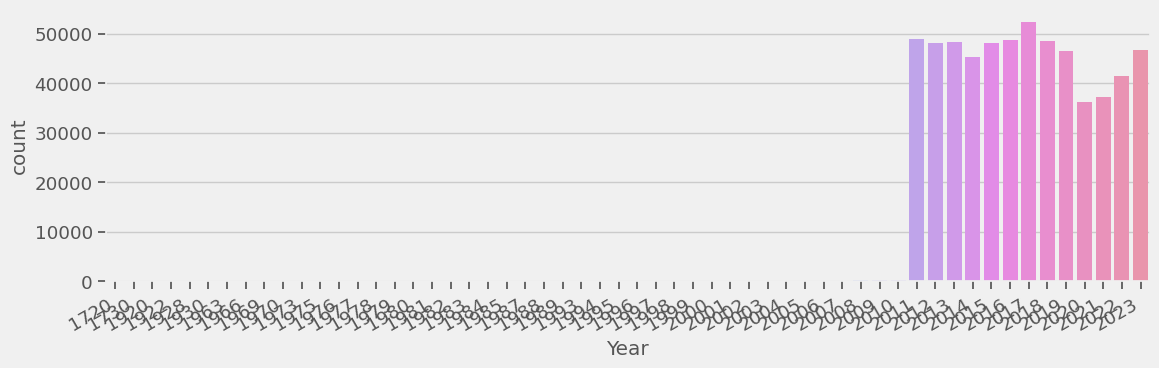

In [45]:
# Visualize years
ax = sns.countplot(data=df, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

- It seems there are documented crimes stretching back a long time, but the bulk of the data is recent. Example values to confirm.

In [46]:
df['Year'].value_counts().sort_index(ascending = False).head(20)

2023    46799
2022    41402
2021    37223
2020    36303
2019    46606
2018    48594
2017    52296
2016    48674
2015    48072
2014    45231
2013    48333
2012    48142
2011    48967
2010      349
2009      211
2008      240
2007       27
2006       18
2005        9
2004       18
Name: Year, dtype: int64

- Limit this dataset to just 2011-present.
    - Because the lesson was drawn up in 2022, we will stop the data there to match with the lesson examples.

In [47]:
# Trim the years of the dataset
df = df.loc['2011':'2022'].copy()

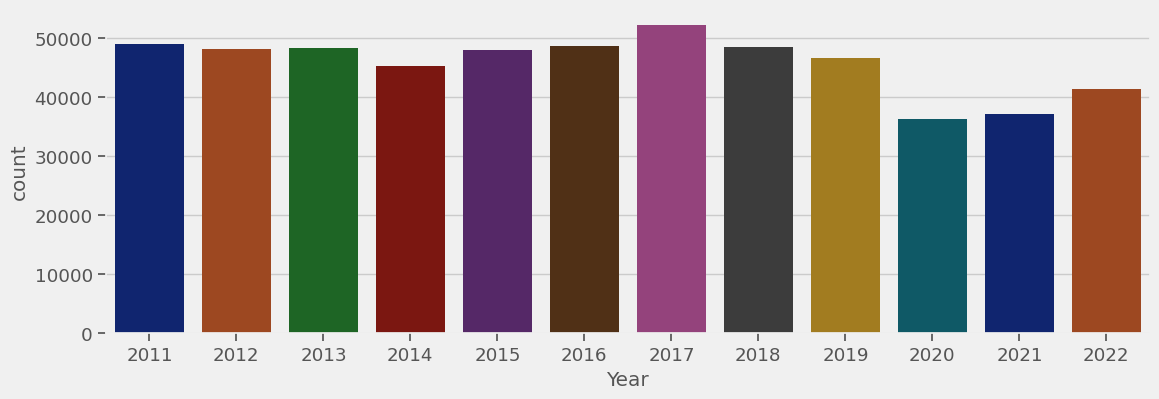

In [48]:
# Create another visual with only the more recent years
sns.countplot(data=df, x='Year', palette='dark');

- This gives a much better representation of crimes by year. Save the year counts data for later use.

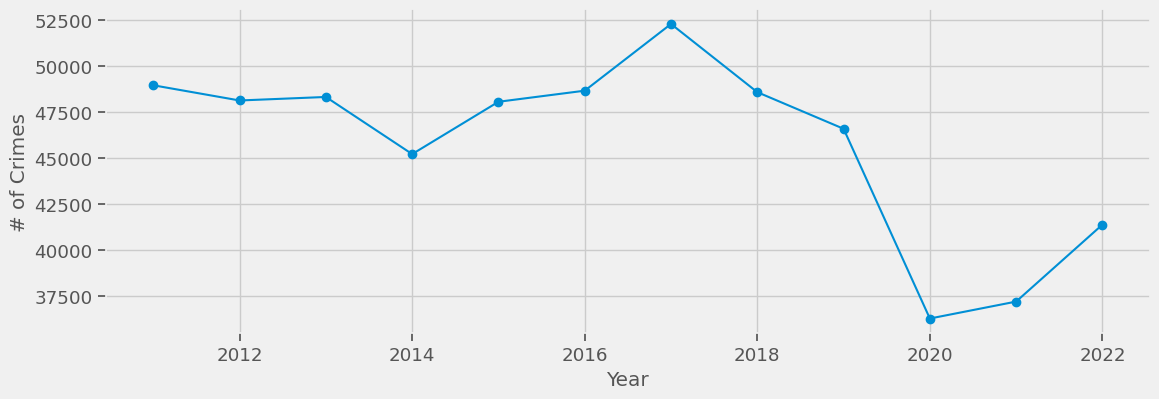

In [49]:
## Save year counts data.
year_counts = df['Year'].value_counts().sort_index()
year_counts.plot(style='o-', grid=True, ylabel='# of Crimes', xlabel='Year');

#### Month

- Next determine which months have a higher or lower crime rate. As with year, it's possible to pull just the month from Datetime and create a new column.
- Additionally, create a column with the name of the month.
- Having both will allow sorting by number to keep months in order, and to display the name in visuals.

In [50]:
# Extracting the month
df['Month'] = df.index.month
df['MonthName'] = df.index.month_name()
df.head(3)

CrimeCode Description Inside_Outside Weapon Gender   Age  \
CrimeDateTime                                                            
2011-01-01           2A        RAPE            NaN  OTHER      M  16.0   
2011-01-01           6E     LARCENY              O    NaN      M  44.0   
2011-01-01           6G     LARCENY              I    NaN      F  26.0   

                                    Race Ethnicity Old_District New_District  \
CrimeDateTime                                                                  
2011-01-01     BLACK_OR_AFRICAN_AMERICAN       NaN      WESTERN          NaN   
2011-01-01     BLACK_OR_AFRICAN_AMERICAN       NaN      WESTERN          NaN   
2011-01-01                         WHITE       NaN     SOUTHERN          NaN   

               Neighborhood   Latitude  Longitude  Total_Incidents  \
CrimeDateTime                                                        
2011-01-01      HARLEM PARK  39.298964 -76.639291                1   
2011-01-01           MOSHER  39.295633 -76.661518                1   
2011-01-01     FEDERAL HILL  39.276987 -76.613380                1   

                     Date  Year  Month MonthName  
CrimeDateTime                                     
2011-01-01     2011-01-01  2011      1   January  
2011-01-01     2011-01-01  2011      1   January  
2011-01-01     2011-01-01  2011      1   January

- Next create a dictionary to match the number of the month to the month name. This will allow keeping months in order by number.

In [51]:
# Saving lookup for number vs name
unique_months = df.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup = dict(zip(unique_months['Month'], unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

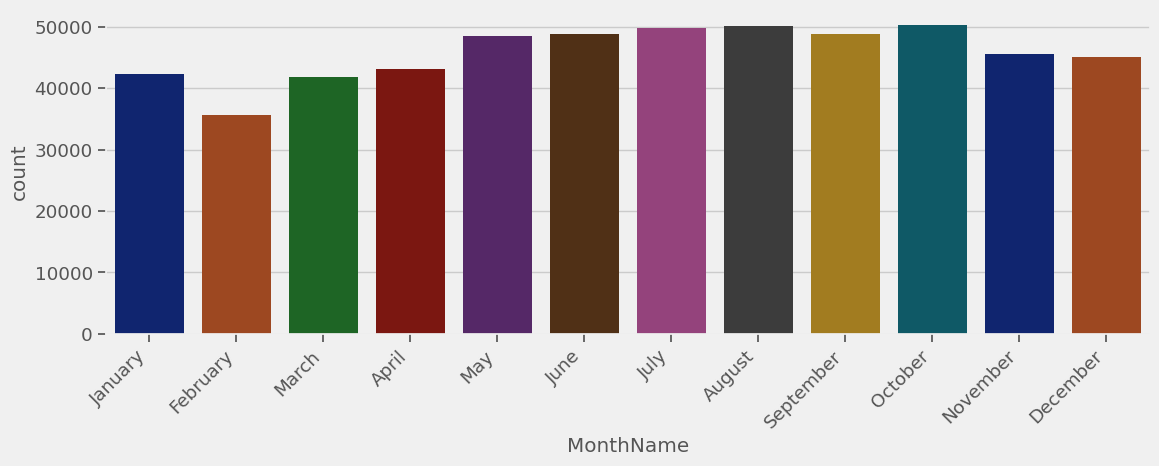

In [52]:
# Make a countplot by month
ax = sns.countplot(data=df, x='MonthName', palette='dark', order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

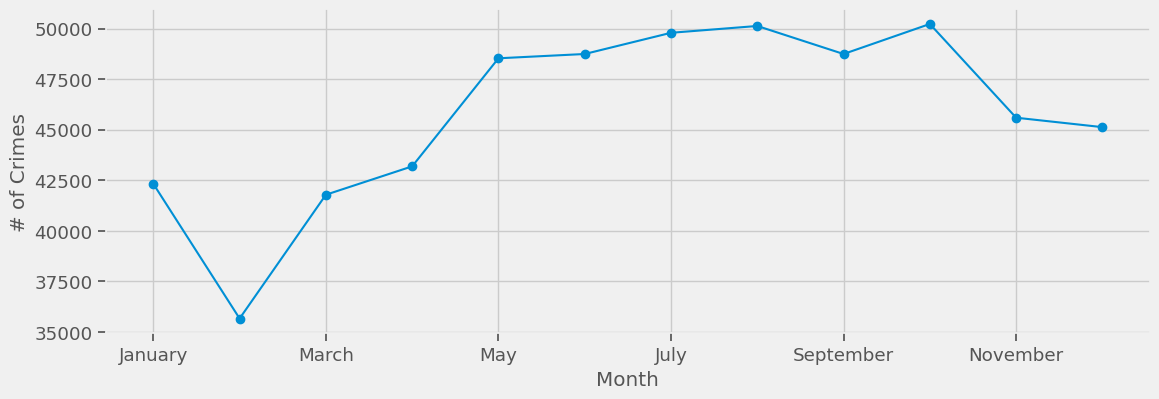

In [53]:
# Next, save crime counts by month
month_counts = df['MonthName'].value_counts()[month_lookup.values()]
ax = month_counts.plot(style='o-', grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

#### Day of Week

- Crimes can be broken down by day of the week in a similar way to months.
- Again, create a column for both the name of the day, and the number

In [54]:
# Add day of the week as both a number and name
df['DayOfWeek'] = df.index.day_name()
df['DayNum'] = df.index.day_of_week
df.head(3)

CrimeCode Description Inside_Outside Weapon Gender   Age  \
CrimeDateTime                                                            
2011-01-01           2A        RAPE            NaN  OTHER      M  16.0   
2011-01-01           6E     LARCENY              O    NaN      M  44.0   
2011-01-01           6G     LARCENY              I    NaN      F  26.0   

                                    Race Ethnicity Old_District New_District  \
CrimeDateTime                                                                  
2011-01-01     BLACK_OR_AFRICAN_AMERICAN       NaN      WESTERN          NaN   
2011-01-01     BLACK_OR_AFRICAN_AMERICAN       NaN      WESTERN          NaN   
2011-01-01                         WHITE       NaN     SOUTHERN          NaN   

               Neighborhood   Latitude  Longitude  Total_Incidents  \
CrimeDateTime                                                        
2011-01-01      HARLEM PARK  39.298964 -76.639291                1   
2011-01-01           MOSHER  39.295633 -76.661518                1   
2011-01-01     FEDERAL HILL  39.276987 -76.613380                1   

                     Date  Year  Month MonthName DayOfWeek  DayNum  
CrimeDateTime                                                       
2011-01-01     2011-01-01  2011      1   January  Saturday       5  
2011-01-01     2011-01-01  2011      1   January  Saturday       5  
2011-01-01     2011-01-01  2011      1   January  Saturday       5

In [55]:
# As above, create a dictionary to match the name and number
unique_days = df.drop_duplicates(subset=['DayNum']).sort_values('DayNum')
day_lookup = dict(zip(unique_days['DayNum'], unique_days['DayOfWeek']))
day_lookup

{0: 'Monday',
 1: 'Tuesday',
 2: 'Wednesday',
 3: 'Thursday',
 4: 'Friday',
 5: 'Saturday',
 6: 'Sunday'}

- Note that datetime's day_of_week starts on Monday with 0, and ends on Sunday with 6.

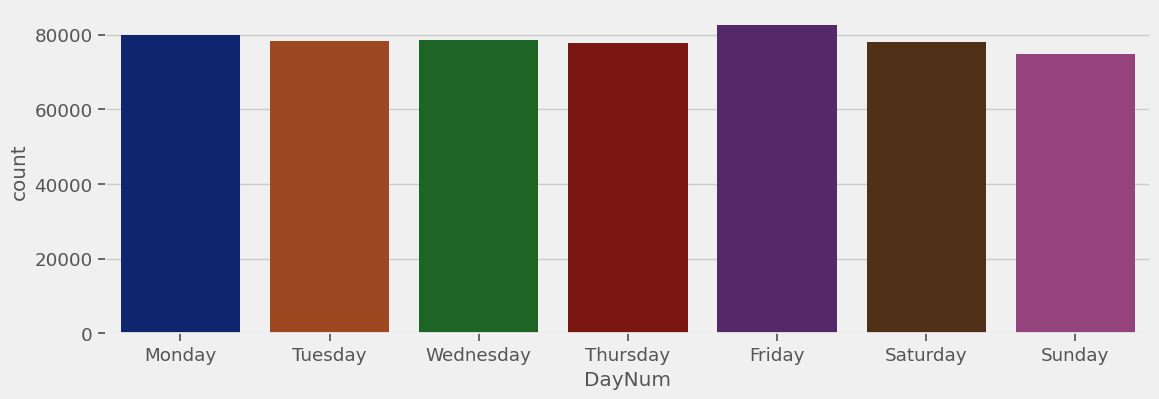

In [56]:
# Plot DayNum, but use names from day_lookup for ticks
ax = sns.countplot(data=df, x='DayNum', palette='dark')
ax.set_xticklabels([v for k,v in day_lookup.items()]);

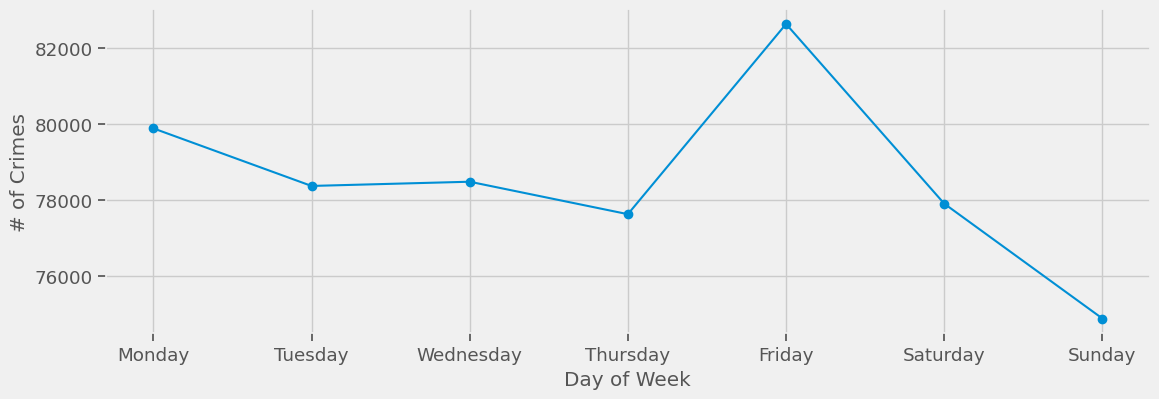

In [57]:
# Save day counts
day_counts = df['DayNum'].value_counts().sort_index()
# With the data in order, rename using day_lookup
day_counts = day_counts.rename(day_lookup)
ax = day_counts.plot(style='o-', grid=True, ylabel='# of Crimes', xlabel='Day of Week')

- It appears crime is the highest on Fridays and lowest on Sundays.

#### Weekend

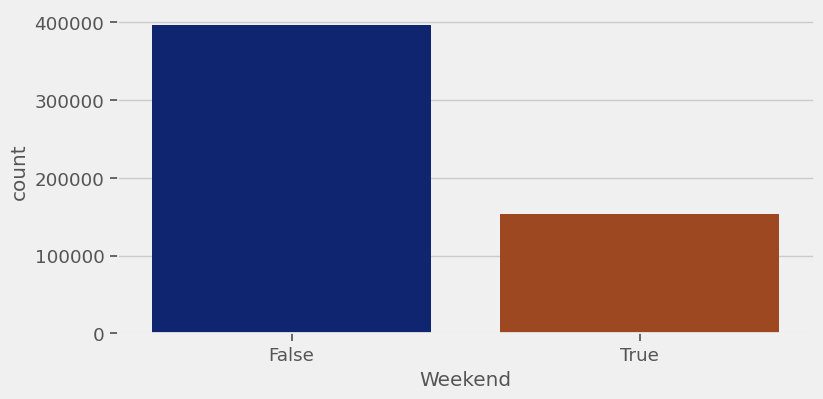

In [58]:
# Examine how crime on the weekends compares to weekdays
df['Weekend'] = df['DayOfWeek'].isin(['Saturday', 'Sunday'])
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Weekend', palette='dark');

- The initial examination could be misleading, because there are five weekdays and only 2 weekend days. A better approach is to examine normalized data by comparing crimes per day.

In [59]:
# Calculating value counts and then dividing by appropriate number
weekend_counts = df['Weekend'].value_counts()
weekend_counts.loc[False] /= 5
weekend_counts.loc[True] /= 2
weekend_counts

False    79407.8
True     76402.0
Name: Weekend, dtype: float64

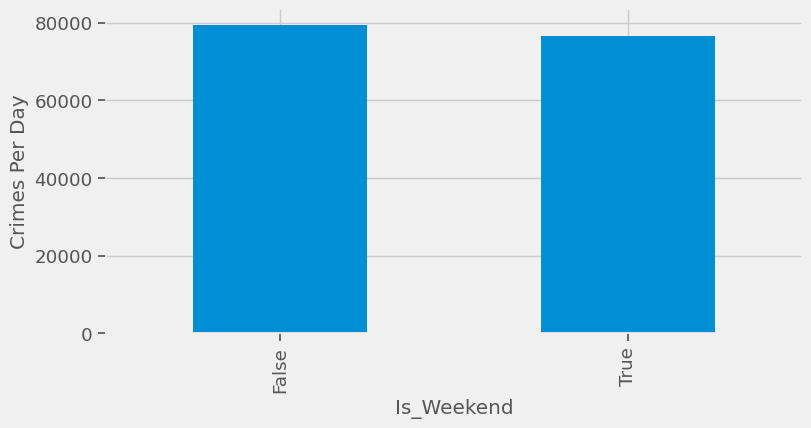

In [60]:
ax = weekend_counts.plot(kind='bar', figsize=(8,4))
ax.set(ylabel='Crimes Per Day', xlabel='Is_Weekend');

- After normalization, weekdays and weekends appear very similar.

#### Hour of the Day

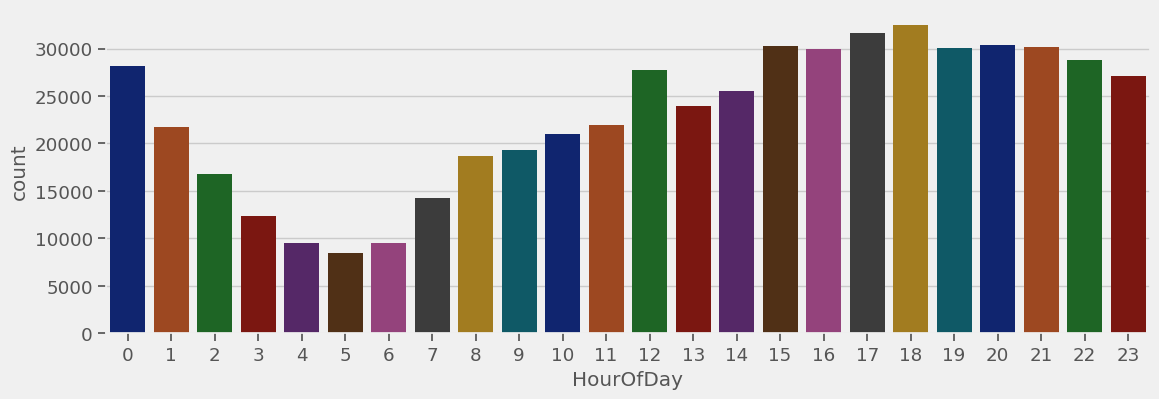

In [61]:
# Examine crimes by hour of the day
df['HourOfDay'] = df.index.hour
sns.countplot(data=df, x='HourOfDay', palette='dark');

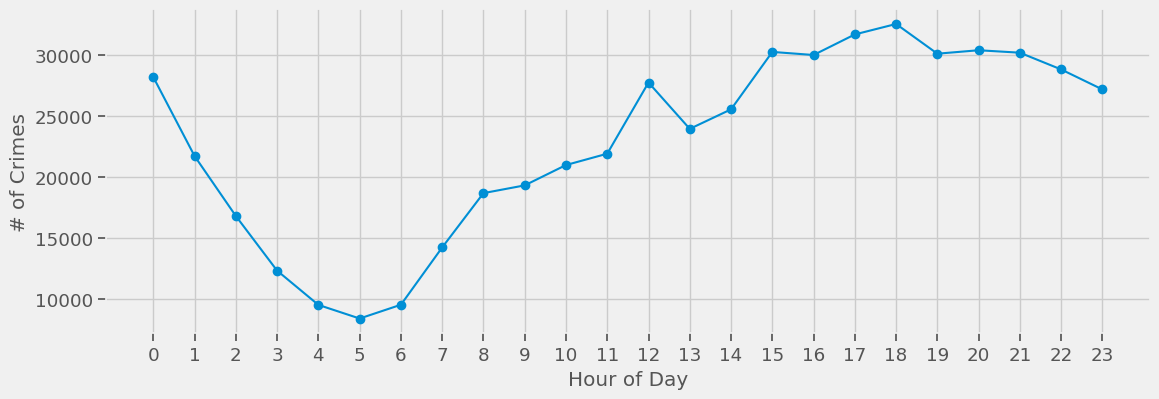

In [62]:
# Save the hour counts
hour_counts = df['HourOfDay'].value_counts().sort_index()
ax = hour_counts.plot(style='o-', grid=True,
                      ylabel='# of Crimes', 
                      xlabel='Hour of Day',
                      xticks=hour_counts.index);

### Summary
- This lesson explored 'binning' values in time series based on a period of time. This allows examination of aggregated data based on different time units such as year, month, etc., down to detailed time data such as hour of the day.
- Depending on the data, the time period can be customized as desired.

## Seasonality

- Goals of this lesson are to:
    - Identify seasonality in time series
    - Apply Seasonal Decomposition to separate time series components
    - Use visualizations to quantify the magnitude and duration of a season 

### Fixing the dataset

**NOTE: The lesson starts with a manipulated dataframe from material that is not online. A workaround is included below.**

In [63]:
# Select a few crimes from the DataFrame to visualize
crimes_list = ['LARCENY', 'LARCENY FROM AUTO', 'AUTO THEFT', 'SHOOTING', 'ROBBERY - CARJACKING']
crimes_mask = df['Description'].isin(crimes)
crimes_filtered = df[crimes_mask]
crimes_filtered.info()
crimes_filtered

NameError: name 'crimes' is not defined

In [ ]:
crimes_ts = crimes_filtered.groupby('Description').resample('D').sum(numeric_only=True)

In [ ]:
crimes_ts = crimes_ts.drop(crimes_ts.columns.difference(['CrimeDateTime', 'Total_Incidents']), 1)

In [ ]:
crimes_ts = crimes_ts.unstack(level=0)
crimes_ts

In [ ]:
crimes_ts = crimes_ts.droplevel(0, axis=1)

**Normal lesson material resumes here**

In [ ]:
crimes_ts.isna().sum()

In [ ]:
# Fill null values with 0
crimes_ts = crimes_ts.fillna(0)

In [ ]:
crimes_ts.plot(grid=True, alpha=0.7);

### Identifying Seasonality

#### Initial Examination

- The goal is to identify any patterns that may occur within the time series.
- Whenever a periodic change in values of a time series repeats, it is considered to have 'seasonality'
    - Just as temperature and weather will change with seasons, many time series also exhibit natural fluctuations, but the time period of a season can vary wildly.
- For this example, take a closer look at ~5 years worth of data.

In [ ]:
plot_df = crimes_ts.loc['2017':'2021']
plot_df.plot(grid=True);

In [ ]:
# Separate each crime into its own plot using subplots = True
plot_df.plot(subplots=True, figsize=(10,12), grid=True);

#### Resampling to a Larger Frequency

- Since the crime data was in daily freq, try resampling it as weekly data.
- Sum the values from each day to get the weekly value.

In [ ]:
plot_df_W = crimes_ts.loc['2017':'2021'].resample("W").sum(numeric_only=True)
plot_df_W.plot(grid=True, subplots=True, figsize=(10,15));

- It is still hard to identify patterns when there are large fluctuations between time steps.
- The effect of random changes between each step can make it more difficult to identify things like seasonality.

#### Use Rolling Mean to Smooth Time Series

In [ ]:
# Leverage use of the rolling mean with a window of 4 weeks to further smooth the data
plot_df_W.rolling(4).mean().dropna().plot(subplots=True, figsize=(10,12));

- Now that a rolling 4-week average is being utilized, some cyclical patterns in the crimes can start to be observed.
    - It appears shootings, auto theft, and possibly larceny have seasonality to them.
- How can seasonal fluctuations in crime data be isolated to better understand the effect of a season? And can it be done without having to smooth the data?

### Decomposition

#### Seasonal Decomposition

- Statsmodels has a function for dividing time series data into 3 components, called `seasonal_decompose`
- The function will decompose the time series into 3 components
    - The trend component (slow, gradual, non-cyclical changes over time)
    - The seasonal component (cyclical changes)
    - The residuals (the remaining fluctuations after removing the trend and seasonal components)
- As an example, apply this function to LARCENY FROM AUTO data

In [ ]:
# Import statsmodel time series analysis api module
import statsmodels.tsa.api as tsa
tsa

In [ ]:
crime_type = 'LARCENY FROM AUTO'
ts = plot_df_W[crime_type]
ts.plot(title=crime_type);

In [ ]:
decomp = tsa.seasonal_decompose(ts)
decomp

- The DecomposeResult object doesn't show very much, but contains all the previously mentioned information.

#### Visualizing Decomposed Results

In [ ]:
# Use .plot() method to view results of decomp
fig = decomp.plot();

- Sadly, there is no way to instruct seasonal decomp to use a different figsize.
- However, a figure's size can be updated after it is created using `fig.set_size_inches()` method.
- Additionally, expand the subplots to fill in the larger figsize, which can be done using `fig.tight_layout()` method.

In [ ]:
fig = decomp.plot()
fig.set_size_inches(10,8)
fig.tight_layout()

- From the above figures we can see:
    - The original raw ts is on top
    - Second is the slower, non-cyclical *trend*
    - Third is the cyclical *seasonal* component
    - Last is the *residuals* after removing the trend and seasonal components

#### Inspecting the Individual Components of Decomposition

**Decompose - Trend**

In [ ]:
decomp.trend

In [ ]:
decomp.trend.plot(title='Trend');

**Decompose - Seasonal**

In [ ]:
decomp.seasonal.head()

In [ ]:
decomp.seasonal.plot(title='Seasonal');

**Decompose - Residuals**

In [ ]:
decomp.resid.head()

In [ ]:
decomp.resid.plot(title='Residual');

#### Decomposition's Separate Components

- The decomposition separated the original raw time series into 3 components.
- The default method for seasonal_decompose is to create components that can be added together to recreate the original time series.

In [ ]:
# Adding decomposition components together
ts_model = decomp.trend + decomp.seasonal + decomp.resid
# Visualize the result
ax = ts_model.plot(label='Recombined from Decomposition')
ax.legend()

In [ ]:
# Visually confirm the original time series is the same as the calculated one
ax = ts.plot(label='Original, Raw')
ts_model.plot(label='Recombined from Decomposition', ax=ax, ls='--', alpha=0.8)
ax.legend();

- Observe that although decomposition could not recreate the very beginning or end of the time series, the recreated portion matches the original data.

### Assessing Seasonal Contributions

- Now that it's possible to decompose a time series to extract the seasonal component, it's also possible to answer questions about how much the time series varies across a season.

In [ ]:
seasonal = decomp.seasonal
ax = seasonal.plot(title=f'Seasonal Component for {crime_type}');
ax.grid(which='both', axis='x');

- The default x-axis ticks are too far apart to reliably estimate the months of peaks and valleys.
- Using matplotlib tick formatters and locators to add minor ticks for each month will make it easier to inspect.

In [ ]:
import matplotlib.dates as mdates
minor_loc = mdates.MonthLocator()
fig, ax = plt.subplots()
ax.plot(seasonal)
ax.set(title=f'Seasonal Component for {crime_type}');
ax.xaxis.set_minor_locator(minor_loc)
ax.grid(which='major', axis='x', lw=1, color='k')
ax.grid(which='minor', axis='x', lw=0.5)
fig.autofmt_xdate(rotation=90, ha='center')

- Examination of the figure shows a recurring pattern with the lowest # of crimes occurring in the month of March.
- Next comes a gradual increase until October, then finally a gradual decrease until March of the following year.

#### Determining Seasonal Fluctuation - Magnitude

- It's possible to get a more definitive answer than a simple visual inspection of a figure.
- To further quantify the magnitude of the seasonal change in the time series, try measuring the distance between the min and max values of the seasonal component.

In [ ]:
seasonal.max()

In [ ]:
seasonal.min()

In [ ]:
magnitude = seasonal.max() - seasonal.min()
magnitude

- There is a seasonal fluctuation of ~72 crimes per week for 'LARCENY FROM AUTO'

#### Determining the Duration of a Season

In [ ]:
# Identify the dates with the min and max (using idxmin/idxmax),
# then calculate the length of this time period
seasonal.idxmax()

In [ ]:
seasonal.idxmin()

**Annotating Periods**
- Because this concerns a period of time, use axvspan to annotate this instead of axvline.
    - Check documentation regarding ax.axvspan
- Below, the figure will be recreated several times, so this will be converted into a simple function.
    - It won't be reused in other contexts in the future, so it can remain simple.
    - The func will take the `seasonal` variable as the only input
    - It will return the fig and ax for the visualization

In [ ]:
import matplotlib.dates as mdates
def plot_seasonal(seasonal):
    minor_loc = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(seasonal)
    ax.set(title=f'Seasonal Component for {crime_type}');
    ax.xaxis.set_minor_locator(minor_loc)
    ax.grid(which='major', axis='x', lw=1, color='k')
    ax.grid(which='minor', axis='x', lw=0.5)
    fig.autofmt_xdate(rotation=90, ha='center')

    return fig, ax

In [ ]:
fig, ax = plot_seasonal(seasonal)
ax.axvspan(seasonal.idxmin(), seasonal.idxmax(), color='lightgreen');

- The above figure covers the period from the first minimum to the first peak of our season.

In [ ]:
delta = seasonal.idxmax() - seasonal.idxmin()
delta

- The time difference between the min and max is 224 days.
- To find the time between one full cycle, calculate the time between one max and the next max.

#### Using `scipy`'s `find_peaks` Function

- Identify the maximum point of each season (the peaks). Then calculate the time between peaks as the seasonal period.
- To do so, make use of scipy's signal submodule. Specifically, scipy.signal.find_peaks
- This takes the time series as the first argument, and supply the height of expected peaks.
    - The maximum value of the seasonal component is already known, as it is the peak height number.

In [ ]:
from scipy.signal import find_peaks
peaks, props = find_peaks(seasonal, height=seasonal.max())

- This will supply two variables: peaks, and props
- Peaks: the integer index of the identified peaks
- Props: a dictionary with additional information calculated during the process of finding the peaks
    - In this instance, it gives the actual height of each peak

In [ ]:
peaks

In [ ]:
props

- To get the dates from the datetime index that corresponds to the integer index for the peaks, simply slice from `seasonal.index` using the peak's integer positions.

In [ ]:
peak_dates = seasonal.index[peaks]
peak_dates

- Now, recreate the graph, but annotate the identified peaks.
- Since both the date and peak value for each peak are known, these values can be added as an additional scatter plot on top of the original figure.

In [ ]:
fig, ax = plot_seasonal(seasonal)
ax.scatter(peak_dates, props['peak_heights'], color='orange');

- It looks as though the peaks have been properly identified.
- Next, calculate the length of a period using the peaks.
    - Find the date of the second peak to calculate the period from the first.

In [ ]:
peak_dates

In [ ]:
period = peak_dates[1] - peak_dates[0]
period

- It appears the period is approximately a full year.
- Confirm this is the same for all dates using a loop.

In [ ]:
periods = []
for i in range(len(peak_dates)-1):
    delta = peak_dates[i+1] - peak_dates[i]
    periods.append(delta)
periods

### Final Annotation

- Confident that the period is 364 days, next is annotating the season as an axvspan, and then the start date of the season as ax axvline with a label.

In [ ]:
fig, ax = plot_seasonal(seasonal)
season_start = seasonal.idxmin()
ax.axvspan(season_start, season_start+period, color='lightgreen')
ax.axvline(season_start, color='green', ls='--',
           label=f"Start of Season {season_start.strftime('%B')}")
ax.legend();

In [ ]:
seasonal.max() - seasonal.min() 

- The figure above aligns perfectly with data!
- The seasonality of larceny from auto crimes has a period of 364 days, and an overall fluctuation of ~72 crimes per week.

### Summary

- This lesson covered Seasonality in time series, and then applied seasonal decomposition to separate the time series into three components: the trend, season, and residuals.
- The seasonal component was further explored with visuals, pandas time deltas, and scipy's find_peaks function to calculate the magnitude of the seasonal fluctuations and duration of season (or period).

# Feature Engineering - Holidays

- Learn to lookup/merge national and regional holidays

In [64]:
!pip install holidays

In [65]:
import holidays
import datetime as dt
from holidays import country_holidays

In [66]:
# Making a date range that covers full dataset
all_days = pd.date_range(df['Date'].min(), df['Date'].max())
all_days

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=4383, freq='D')

### Getting General US Holidays

In [67]:
# Create an instance of the US country holidays
us_holidays = country_holidays('US')
us_holidays

holidays.country_holidays('US')

In [68]:
# Testing first date
print(all_days[0])
us_holidays.get(all_days[0])

2011-01-01 00:00:00


"New Year's Day"

In [69]:
# Getting US holidays for all dates
holiday_list = [us_holidays.get(day) for day in all_days]
holiday_list[:5]

["New Year's Day", None, None, None, None]

### Getting Sub-Region Holidays

In [70]:
# For a specific subdivisions (e.g., state or province)
md_holidays = country_holidays('US', subdiv='MD')
md_holidays

holidays.country_holidays('US', subdiv='MD')

In [72]:
# Next create a column for US holidays and Maryland holidays in the dataframe
df['US Holiday'] = [us_holidays.get(day) for day in df['Date']]
df['MD Holiday'] = [md_holidays.get(day) for day in df['Date']]
df.head()

CrimeCode Description Inside_Outside Weapon Gender   Age  \
CrimeDateTime                                                                  
2011-01-01 00:00:00        2A        RAPE            NaN  OTHER      M  16.0   
2011-01-01 00:00:00        6E     LARCENY              O    NaN      M  44.0   
2011-01-01 00:00:00        6G     LARCENY              I    NaN      F  26.0   
2011-01-01 00:01:00        6J     LARCENY              I    NaN      M  24.0   
2011-01-01 00:01:00        6G     LARCENY              I    NaN    NaN   NaN   

                                          Race Ethnicity Old_District  \
CrimeDateTime                                                           
2011-01-01 00:00:00  BLACK_OR_AFRICAN_AMERICAN       NaN      WESTERN   
2011-01-01 00:00:00  BLACK_OR_AFRICAN_AMERICAN       NaN      WESTERN   
2011-01-01 00:00:00                      WHITE       NaN     SOUTHERN   
2011-01-01 00:01:00                      WHITE       NaN     SOUTHERN   
2011-01-01 00:01:00                    UNKNOWN       NaN    SOUTHEAST   

                    New_District  Neighborhood   Latitude  Longitude  \
CrimeDateTime                                                          
2011-01-01 00:00:00          NaN   HARLEM PARK  39.298964 -76.639291   
2011-01-01 00:00:00          NaN        MOSHER  39.295633 -76.661518   
2011-01-01 00:00:00          NaN  FEDERAL HILL  39.276987 -76.613380   
2011-01-01 00:01:00          NaN  FEDERAL HILL  39.274854 -76.612777   
2011-01-01 00:01:00          NaN     GREEKTOWN  39.285083 -76.552772   

                     Total_Incidents        Date  Year  Month MonthName  \
CrimeDateTime                                                             
2011-01-01 00:00:00                1  2011-01-01  2011      1   January   
2011-01-01 00:00:00                1  2011-01-01  2011      1   January   
2011-01-01 00:00:00                1  2011-01-01  2011      1   January   
2011-01-01 00:01:00                1  2011-01-01  2011      1   January   
2011-01-01 00:01:00                1  2011-01-01  2011      1   January   

                    DayOfWeek  DayNum  Weekend  HourOfDay      US Holiday  \
CrimeDateTime                                                               
2011-01-01 00:00:00  Saturday       5     True          0  New Year's Day   
2011-01-01 00:00:00  Saturday       5     True          0  New Year's Day   
2011-01-01 00:00:00  Saturday       5     True          0  New Year's Day   
2011-01-01 00:01:00  Saturday       5     True          0  New Year's Day   
2011-01-01 00:01:00  Saturday       5     True          0  New Year's Day   

                         MD Holiday  
CrimeDateTime                        
2011-01-01 00:00:00  New Year's Day  
2011-01-01 00:00:00  New Year's Day  
2011-01-01 00:00:00  New Year's Day  
2011-01-01 00:01:00  New Year's Day  
2011-01-01 00:01:00  New Year's Day

In [73]:
# US holidays
df['US Holiday'].value_counts()

New Year's Day                                     1782
Columbus Day                                       1686
Labor Day                                          1673
Memorial Day                                       1537
Veterans Day                                       1524
Independence Day                                   1522
Martin Luther King Jr. Day                         1305
Christmas Day                                      1246
Thanksgiving                                       1208
Washington's Birthday                              1194
Christmas Day (Observed)                            415
Veterans Day (Observed)                             394
New Year's Day (Observed)                           390
Independence Day (Observed)                         377
Juneteenth National Independence Day                267
Juneteenth National Independence Day (Observed)     210
Name: US Holiday, dtype: int64

In [74]:
# MD Holidays
df['MD Holiday'].value_counts()

New Year's Day                                             1782
Columbus Day                                               1686
Labor Day                                                  1673
Memorial Day                                               1537
Veterans Day                                               1524
Independence Day                                           1522
American Indian Heritage Day                               1472
Christmas Day                                              1246
Thanksgiving                                               1208
Washington's Birthday                                      1194
Martin Luther King Jr. Day                                 1194
Christmas Day (Observed)                                    415
Inauguration Day                                            409
Veterans Day (Observed)                                     394
New Year's Day (Observed)                                   390
Independence Day (Observed)             

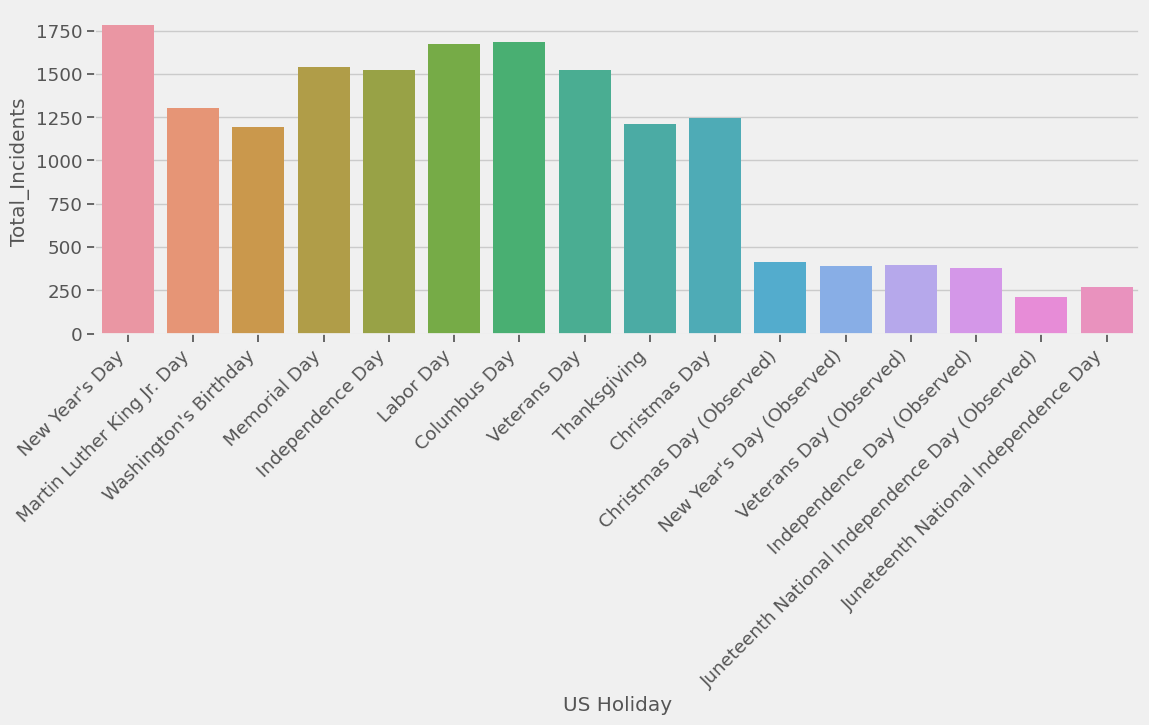

In [75]:
ax = sns.barplot(data=df, x='US Holiday', y='Total_Incidents', estimator=np.sum)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

In [76]:
# Saving a binay of is holiday feature
df['Is_Holiday'] = df['US Holiday'].notna()
df['Is_Holiday'].value_counts()

False    533113
True      16730
Name: Is_Holiday, dtype: int64

### Summary

- This lesson demonstrated how to use the 'holidays' package and extract holiday information for specific dates and locations.
- Time series data is easy to supplement with other sources, as long as the dates can be aligned.